<a href="https://colab.research.google.com/github/IaponaMother/Artificial_Neuron/blob/master/california_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [22]:
train = pd.read_csv('sample_data/california_housing_train.csv')
test = pd.read_csv('sample_data/california_housing_test.csv')
print(train)
features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
target = 'median_house_value'
x_train = train[features].values
x_test = test[features].values
y_train = train[target].values
y_test = test[target].values
print("\n")
print("\n x_train")
print(x_train)
print("\n y_train")
print(y_train)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -114.31     34.19                15.0       5612.0          1283.0   
1        -114.47     34.40                19.0       7650.0          1901.0   
2        -114.56     33.69                17.0        720.0           174.0   
3        -114.57     33.64                14.0       1501.0           337.0   
4        -114.57     33.57                20.0       1454.0           326.0   
...          ...       ...                 ...          ...             ...   
16995    -124.26     40.58                52.0       2217.0           394.0   
16996    -124.27     40.69                36.0       2349.0           528.0   
16997    -124.30     41.84                17.0       2677.0           531.0   
16998    -124.30     41.80                19.0       2672.0           552.0   
16999    -124.35     40.54                52.0       1820.0           300.0   

       population  households  median_income  media

In [25]:
mean = x_train.mean(axis = 0)  # среднее значение
std = x_train.std(axis = 0)  # стандартное отклонение
print(mean)
print(" \n ")
print(std)


[-119.56210824   35.62522471   28.58935294 2643.66441176  539.41082353
 1429.57394118  501.22194118    3.8835781 ]
 
 
[2.00510743e+00 2.13727693e+00 1.25865668e+01 2.17988295e+03
 4.21487054e+02 1.14781920e+03 3.84509531e+02 1.90810040e+00]


In [27]:
x_train -= mean
x_train /= std
x_test -= mean
x_test /= std
model = Sequential()
model.add(Dense(64, activation='relu', input_shape = (x_train.shape[1],)))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'relu'))
model.compile(optimizer = "adam", loss = "mse", metrics= ['mae'])
history = model.fit(x_train,
                    y_train,
                    epochs=200,
                    validation_split = 0.1,
                    verbose = 2)


Epoch 1/200
479/479 - 2s - loss: 33179676672.0000 - mae: 145080.0156 - val_loss: 18971424768.0000 - val_mae: 111944.9375 - 2s/epoch - 3ms/step
Epoch 2/200
479/479 - 1s - loss: 12926235648.0000 - mae: 88778.7812 - val_loss: 18945576960.0000 - val_mae: 111765.2812 - 849ms/epoch - 2ms/step
Epoch 3/200
479/479 - 1s - loss: 12827103232.0000 - mae: 88539.3984 - val_loss: 18860527616.0000 - val_mae: 111477.0703 - 871ms/epoch - 2ms/step
Epoch 4/200
479/479 - 1s - loss: 12722741248.0000 - mae: 88223.8125 - val_loss: 19004342272.0000 - val_mae: 111577.7500 - 815ms/epoch - 2ms/step
Epoch 5/200
479/479 - 1s - loss: 12602615808.0000 - mae: 87858.0859 - val_loss: 19415748608.0000 - val_mae: 112137.7422 - 787ms/epoch - 2ms/step
Epoch 6/200
479/479 - 1s - loss: 12483434496.0000 - mae: 87304.1016 - val_loss: 17891911680.0000 - val_mae: 109287.3906 - 795ms/epoch - 2ms/step
Epoch 7/200
479/479 - 1s - loss: 12353092608.0000 - mae: 87239.9453 - val_loss: 17980706816.0000 - val_mae: 109253.8516 - 810ms/epoc

In [29]:
model2 = Sequential()
model2.add(Dense(64, activation='relu', input_shape = (x_train.shape[1],)))
model2.add(Dense(32, activation = 'relu'))
model2.add(Dense(1, activation = 'relu'))
model2.compile(optimizer = "adam", loss = "mse", metrics= ['mae'])
history = model2.fit(x_train,
                    y_train,
                    epochs=500,
                    validation_split = 0.1,
                    verbose = 2)

Epoch 1/500
479/479 - 2s - loss: 51611254784.0000 - mae: 196638.3906 - val_loss: 63432781824.0000 - val_mae: 214765.9531 - 2s/epoch - 5ms/step
Epoch 2/500
479/479 - 1s - loss: 28549675008.0000 - mae: 127975.1016 - val_loss: 26326380544.0000 - val_mae: 126269.7812 - 1s/epoch - 3ms/step
Epoch 3/500
479/479 - 1s - loss: 13557969920.0000 - mae: 87330.4453 - val_loss: 19197102080.0000 - val_mae: 112395.1406 - 1s/epoch - 2ms/step
Epoch 4/500
479/479 - 1s - loss: 12992435200.0000 - mae: 89073.5859 - val_loss: 19213189120.0000 - val_mae: 112377.1328 - 746ms/epoch - 2ms/step
Epoch 5/500
479/479 - 1s - loss: 12958140416.0000 - mae: 88784.0781 - val_loss: 18929156096.0000 - val_mae: 111838.3906 - 728ms/epoch - 2ms/step
Epoch 6/500
479/479 - 1s - loss: 12920616960.0000 - mae: 88922.0000 - val_loss: 19170420736.0000 - val_mae: 112206.4688 - 731ms/epoch - 2ms/step
Epoch 7/500
479/479 - 1s - loss: 12882702336.0000 - mae: 88590.3047 - val_loss: 18969151488.0000 - val_mae: 111808.7812 - 740ms/epoch - 2

In [31]:
scores = model.evaluate(x_test, y_test, verbose = 2)
print("Средняя абсолюная ошибка на тестовых данных:", round(scores[1], 4))
print("\n")
scores2 = model2.evaluate(x_test, y_test, verbose = 2)
print("Средняя абсолюная ошибка на тестовых данных:", round(scores2[1], 4))


94/94 - 0s - loss: 55164485632.0000 - mae: 205846.2969 - 132ms/epoch - 1ms/step
Средняя абсолюная ошибка на тестовых данных: 205846.2969


94/94 - 0s - loss: 6820057088.0000 - mae: 59688.8203 - 114ms/epoch - 1ms/step
Средняя абсолюная ошибка на тестовых данных: 59688.8203


In [32]:
pred = model2.predict(x_test).flatten()
print(pred)

[299179.03 204646.97 293886.9  ... 117152.9  190732.02 412868.53]


In [33]:
test_index = 0
print("Предсказанная стоимость:", pred[test_index], ", правильная стоимость: ", y_test[test_index])


Предсказанная стоимость: 299179.03 , правильная стоимость:  344700.0


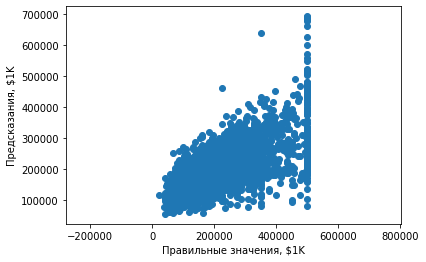

In [35]:
plt.scatter(y_test, pred)
plt.xlabel('Правильные значения, $1K')
plt.ylabel('Предсказания, $1K')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.plot([-100, 100], [-100, 100])
plt.show()


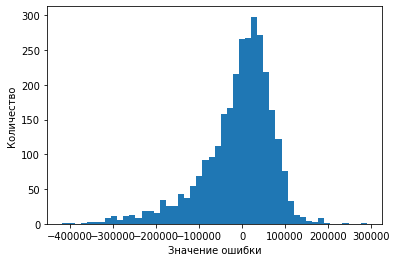

In [36]:
error = pred - y_test
plt.hist(error, bins = 50)
plt.xlabel("Значение ошибки")
plt.ylabel("Количество")
plt.show()